# Sección C - BOPS

### Carga y limpieza de los datos (parte de la limpieza se hizo directamente en el archivo CSV)

In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import seaborn as sns

In [2]:
online = pd.read_csv("Data/bops_online.csv")

In [3]:
print(online.head())
print(online.tail())

   id (DMA)  year  month  week  after  close   sales
0         1  2011      4    17      0      1  18,564
1         1  2011      4    18      0      1  30,883
2         1  2011      5    19      0      1  37,425
3         1  2011      5    20      0      1  32,563
4         1  2011      5    21      0      1  35,773
       id (DMA)  year  month  week  after  close  sales
10705       210  2012      2    10      1      0  9,357
10706       210  2012      3    11      1      0  3,013
10707       210  2012      3    12      1      0  3,155
10708       210  2012      3    13      1      0  2,925
10709       210  2012      3    14      1      0  3,701


In [4]:
print(online.dtypes)
print(online.describe())

id (DMA)     int64
year         int64
month        int64
week         int64
after        int64
close        int64
sales       object
dtype: object
           id (DMA)          year         month         week         after  \
count  10710.000000  10710.000000  10710.000000  10710.00000  10710.000000   
mean     105.500000   2011.274510      6.450980     27.45098      0.490196   
std       60.623921      0.446288      3.533278     15.42074      0.499927   
min        1.000000   2011.000000      1.000000      1.00000      0.000000   
25%       53.000000   2011.000000      3.000000     13.00000      0.000000   
50%      105.500000   2011.000000      7.000000     28.00000      0.000000   
75%      158.000000   2012.000000     10.000000     41.00000      1.000000   
max      210.000000   2012.000000     12.000000     53.00000      1.000000   

              close  
count  10710.000000  
mean       0.480952  
std        0.499660  
min        0.000000  
25%        0.000000  
50%        0.00000

In [5]:
# Limpiando y corrigiendo el tipo de dato
online["sales"] = online["sales"].str.replace(',','')
online["sales"] = online["sales"].astype("float64")


In [6]:
print(online.dtypes)
print(online.describe())

id (DMA)      int64
year          int64
month         int64
week          int64
after         int64
close         int64
sales       float64
dtype: object
           id (DMA)          year         month         week         after  \
count  10710.000000  10710.000000  10710.000000  10710.00000  10710.000000   
mean     105.500000   2011.274510      6.450980     27.45098      0.490196   
std       60.623921      0.446288      3.533278     15.42074      0.499927   
min        1.000000   2011.000000      1.000000      1.00000      0.000000   
25%       53.000000   2011.000000      3.000000     13.00000      0.000000   
50%      105.500000   2011.000000      7.000000     28.00000      0.000000   
75%      158.000000   2012.000000     10.000000     41.00000      1.000000   
max      210.000000   2012.000000     12.000000     53.00000      1.000000   

              close          sales  
count  10710.000000   10710.000000  
mean       0.480952   13755.704855  
std        0.499660   22411.7377

In [127]:
online.groupby(['after'])['sales'].mean()

after
0    14737.841392
1    12734.282857
Name: sales, dtype: float64

In [123]:
online['year_week'] = online['year'].astype(str) + "-" + online['week'].astype(str)
year_weak_lst = online['year_week'].unique().tolist()
online_grp = online.groupby(['after','close','year_week'])['sales'].mean()
online_grp

after  close  year_week
0      0      2011-17      16158.366972
              2011-18      16914.449541
              2011-19      17632.587156
              2011-20      18530.128440
              2011-21      19518.568807
                               ...     
1      1      2012-5        7179.930693
              2012-6        9273.663366
              2012-7        7726.881188
              2012-8        8826.623762
              2012-9        9925.584158
Name: sales, Length: 102, dtype: float64

    index  after  close year_week         sales
0       0      0      0   2011-17  16158.366972
1       1      0      0   2011-18  16914.449541
2       2      0      0   2011-19  17632.587156
3       3      0      0   2011-20  18530.128440
4       4      0      0   2011-21  19518.568807
5       5      0      0   2011-22  15336.733945
6       6      0      0   2011-23  17848.238532
7       7      0      0   2011-24  16448.339450
8       8      0      0   2011-25  17275.100917
9       9      0      0   2011-26  16905.743119
10     10      0      0   2011-27  16247.366972
11     11      0      0   2011-28  14073.770642
12     12      0      0   2011-29  15007.403670
13     13      0      0   2011-30  13205.669725
14     14      0      0   2011-31  14018.449541
15     15      0      0   2011-32  15811.045872
16     16      0      0   2011-33  15756.752294
17     17      0      0   2011-34  13536.422018
18     18      0      0   2011-35  12603.559633
19     19      0      0   2011-36  14595

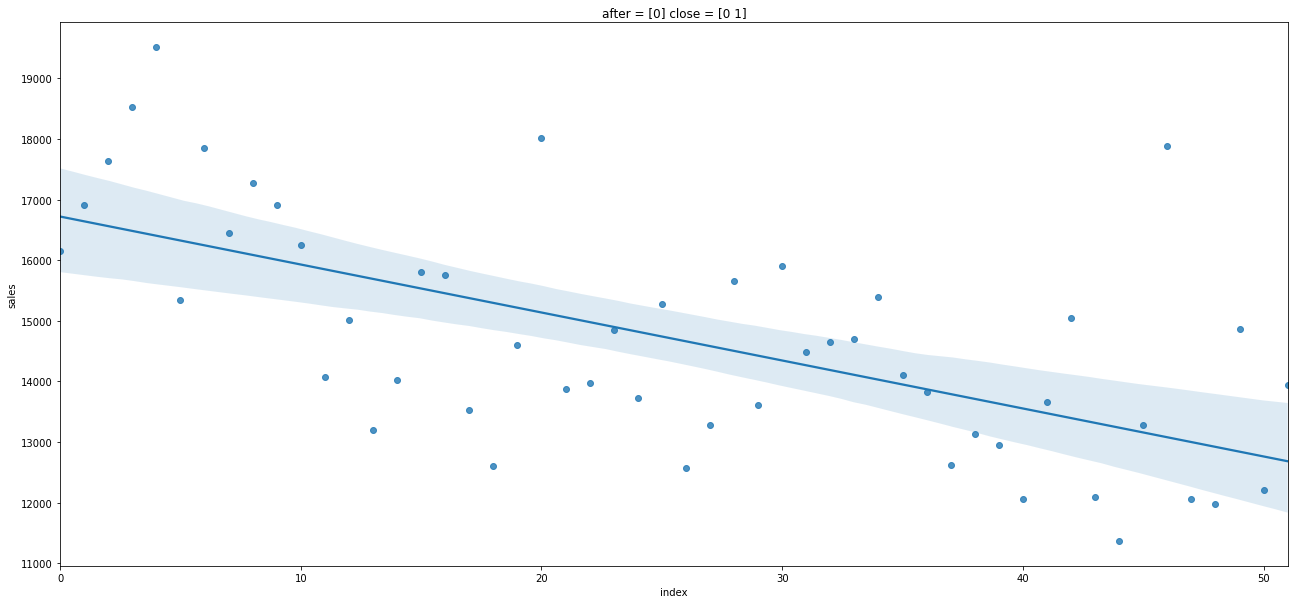

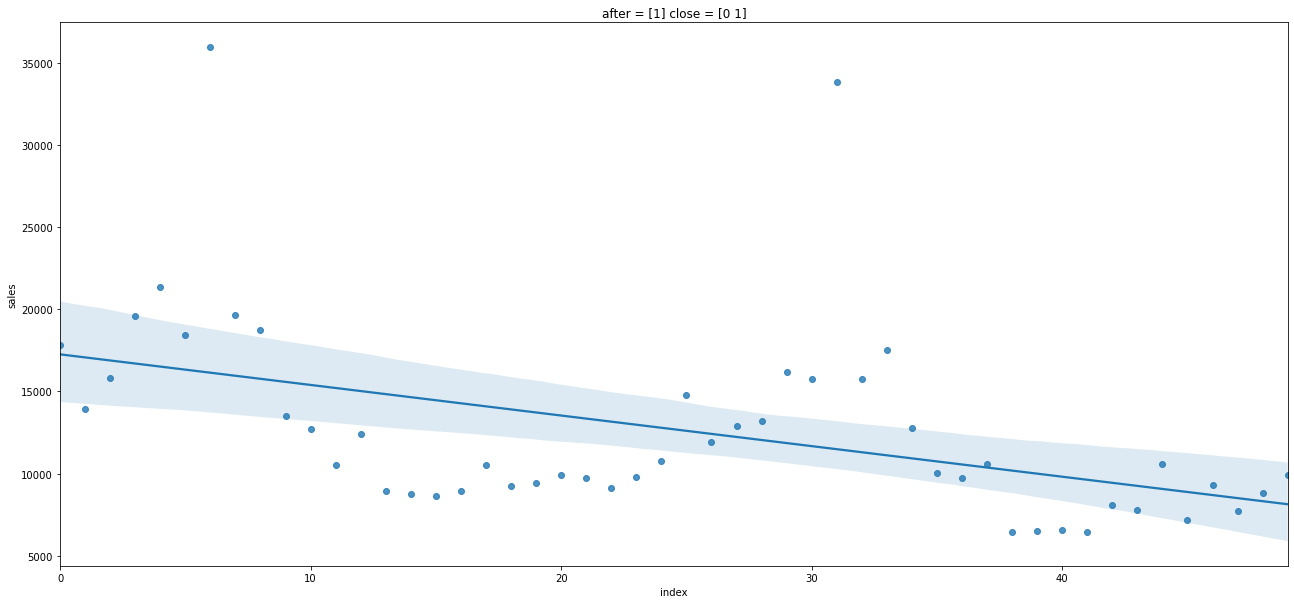

In [135]:
for after, online_dum1 in online_grp.groupby(level=[0]):
    online_dum2 =online_dum1.reset_index().reset_index()
    #online_dum2 =online_dum1
    print(online_dum2)
    # Grafico 
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(online_dum2["after"].unique()) + " close = " + str(online_dum2["close"].unique()))
    sns.regplot(x="index", y="sales", data = online_dum2, order=1)
    #ind = np.arange(len(year_weak_lst))
    #plt.xticks(ind, year_weak_lst)


    #plt.figure(figsize=(22,10))
    #sns.regplot(x="index", y="sales", data = online_dum2, order=1)

    index  after  close year_week         sales
0       0      0      0   2011-17  16158.366972
1       1      0      0   2011-18  16914.449541
2       2      0      0   2011-19  17632.587156
3       3      0      0   2011-20  18530.128440
4       4      0      0   2011-21  19518.568807
5       5      0      0   2011-22  15336.733945
6       6      0      0   2011-23  17848.238532
7       7      0      0   2011-24  16448.339450
8       8      0      0   2011-25  17275.100917
9       9      0      0   2011-26  16905.743119
10     10      0      0   2011-27  16247.366972
11     11      0      0   2011-28  14073.770642
12     12      0      0   2011-29  15007.403670
13     13      0      0   2011-30  13205.669725
14     14      0      0   2011-31  14018.449541
15     15      0      0   2011-32  15811.045872
16     16      0      0   2011-33  15756.752294
17     17      0      0   2011-34  13536.422018
18     18      0      0   2011-35  12603.559633
19     19      0      0   2011-36  14595

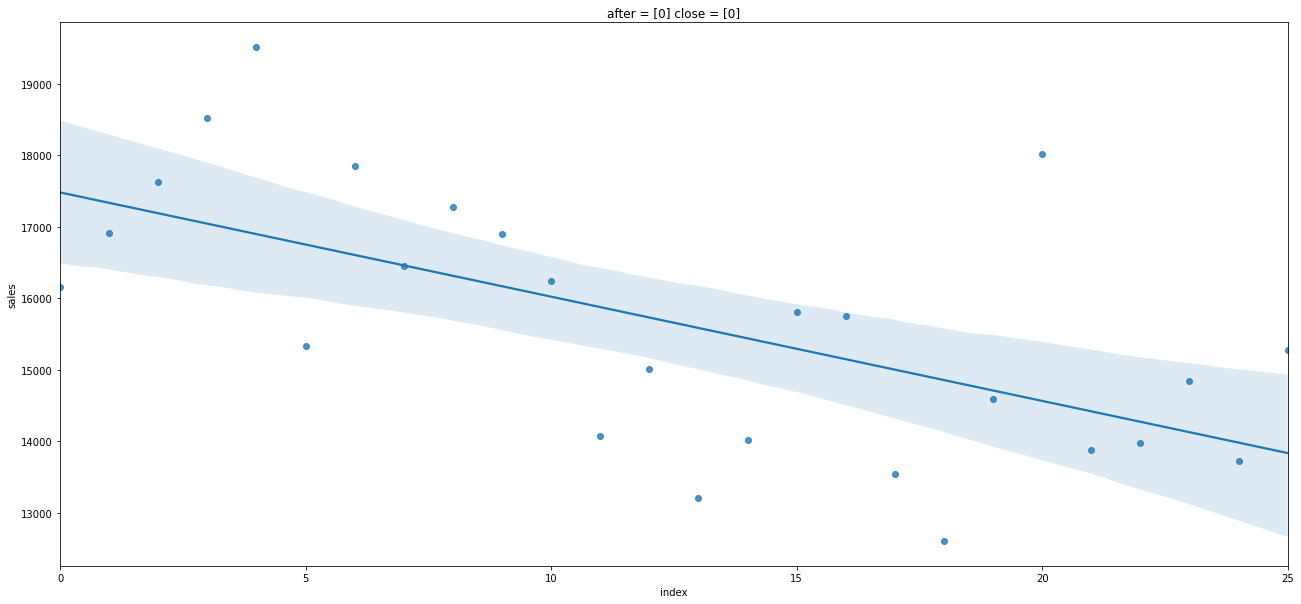

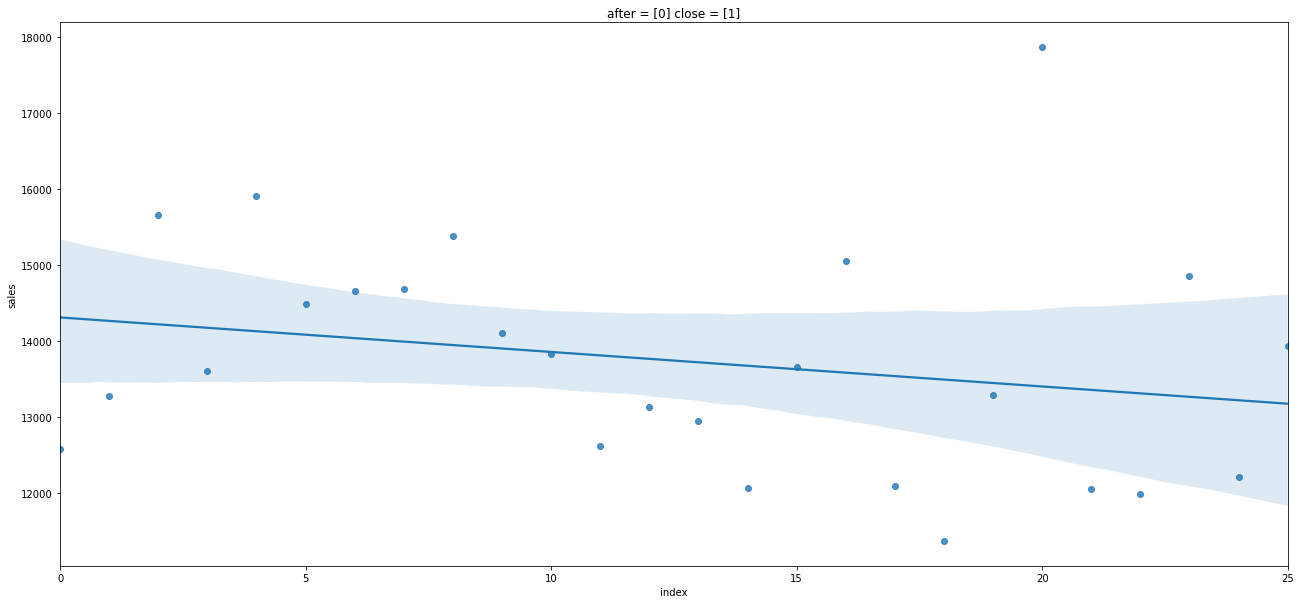

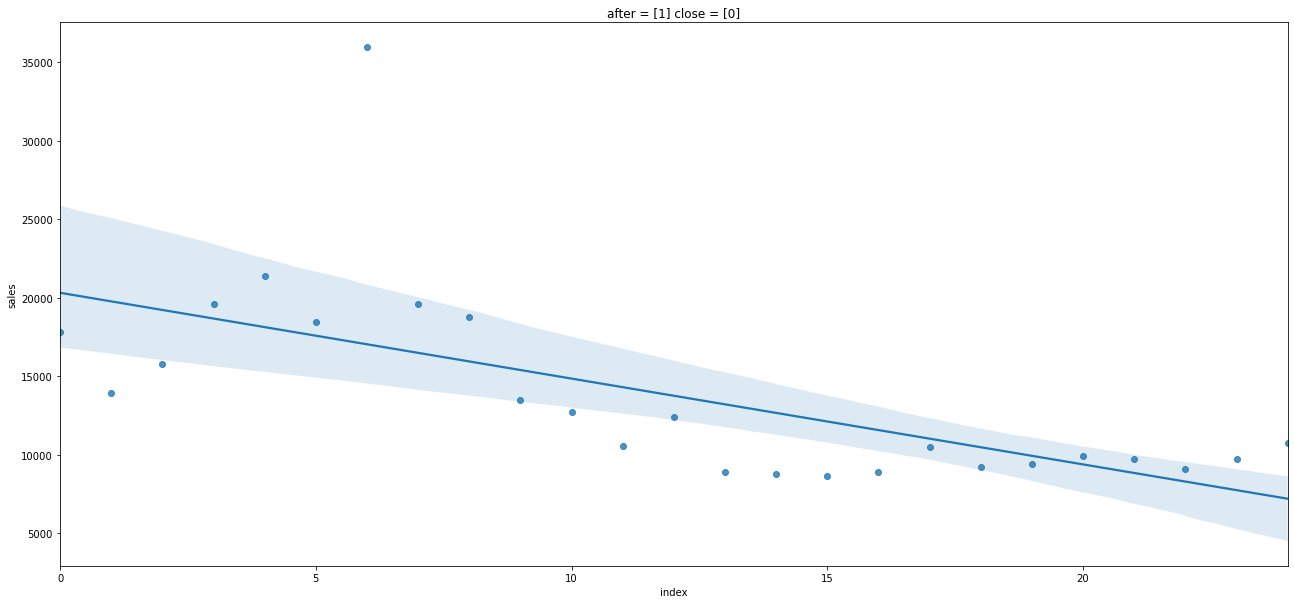

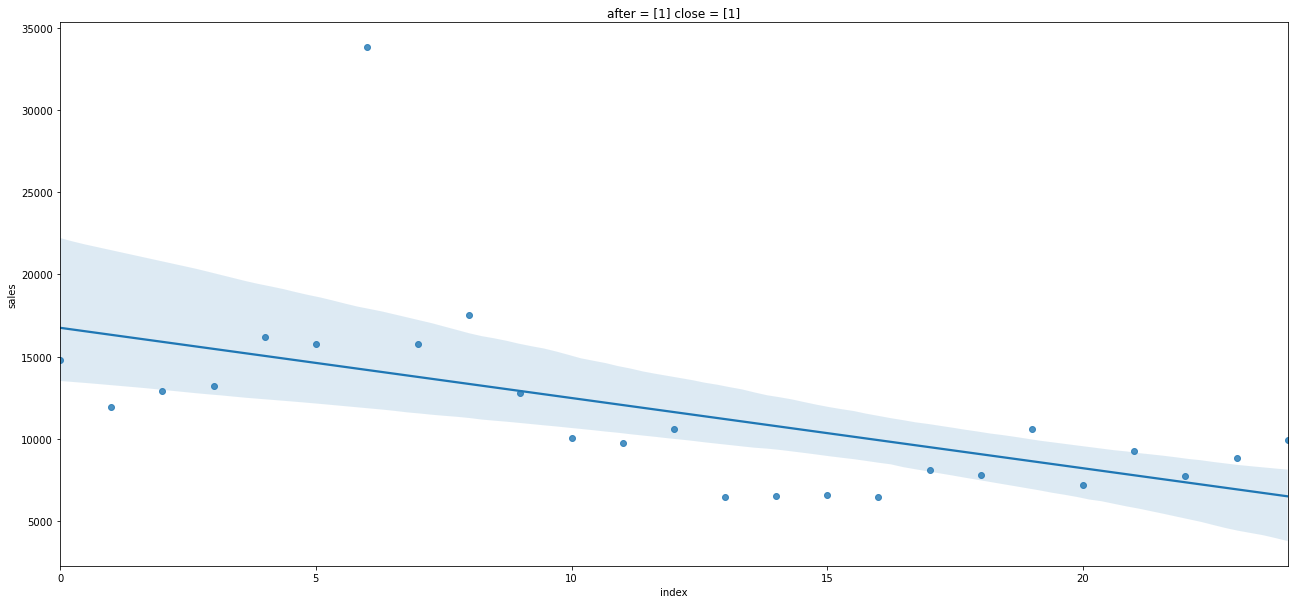

In [136]:
for after, online_dum1 in online_grp.groupby(level=[0,1]):
    online_dum2 =online_dum1.reset_index().reset_index()
    print(online_dum2)
    # Grafico solo un delito para verificar que la pendiente es correcta
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(online_dum2["after"].unique()) + " close = " + str(online_dum2["close"].unique()))
    sns.regplot(x="index", y="sales", data = online_dum2, order=1)
    #ind = np.arange(len(year_weak_lst))
    #plt.xticks(ind, year_weak_lst)


    #plt.figure(figsize=(22,10))
    #sns.regplot(x="index", y="sales", data = online_dum2, order=1)

In [140]:
online_grp_week = online.groupby(['after','close','week'])['sales'].mean()
online_grp_week

after  close  week
0      0      17      16158.366972
              18      16914.449541
              19      17632.587156
              20      18530.128440
              21      19518.568807
                          ...     
1      1      49      33862.118812
              50      15742.306931
              51      17521.089109
              52      12796.415842
              53      10031.990099
Name: sales, Length: 102, dtype: float64

    index  after  close  week         sales
0       0      0      0    17  16158.366972
1       1      0      0    18  16914.449541
2       2      0      0    19  17632.587156
3       3      0      0    20  18530.128440
4       4      0      0    21  19518.568807
5       5      0      0    22  15336.733945
6       6      0      0    23  17848.238532
7       7      0      0    24  16448.339450
8       8      0      0    25  17275.100917
9       9      0      0    26  16905.743119
10     10      0      0    27  16247.366972
11     11      0      0    28  14073.770642
12     12      0      0    29  15007.403670
13     13      0      0    30  13205.669725
14     14      0      0    31  14018.449541
15     15      0      0    32  15811.045872
16     16      0      0    33  15756.752294
17     17      0      0    34  13536.422018
18     18      0      0    35  12603.559633
19     19      0      0    36  14595.917431
20     20      0      0    37  18021.926606
21     21      0      0    38  1

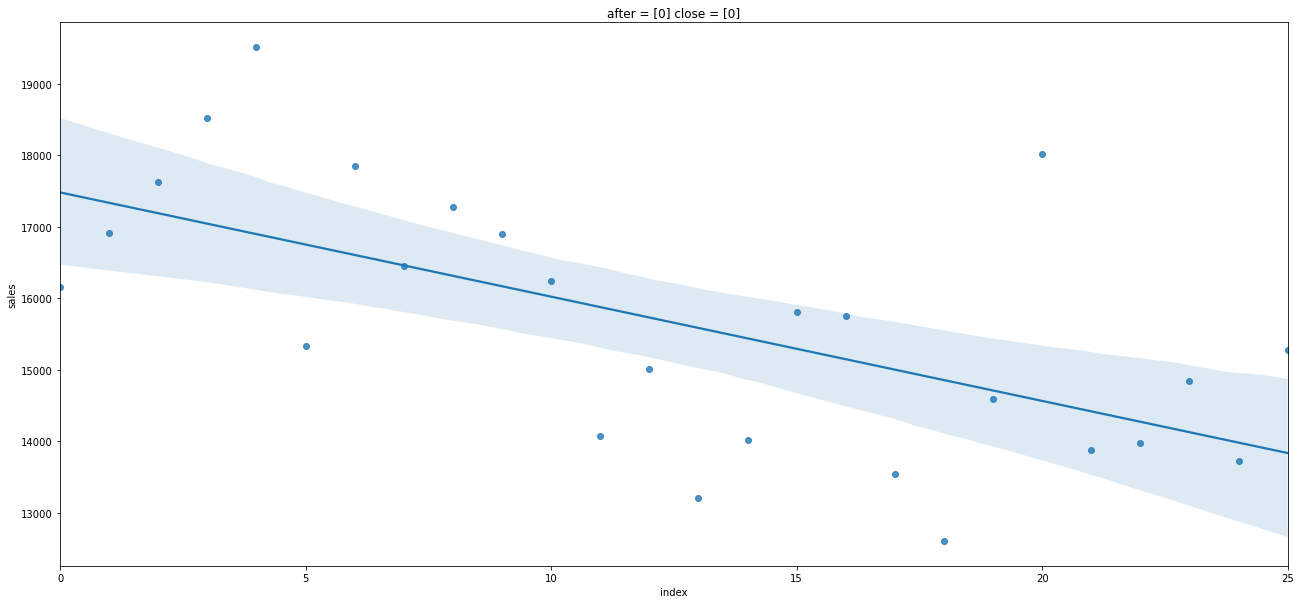

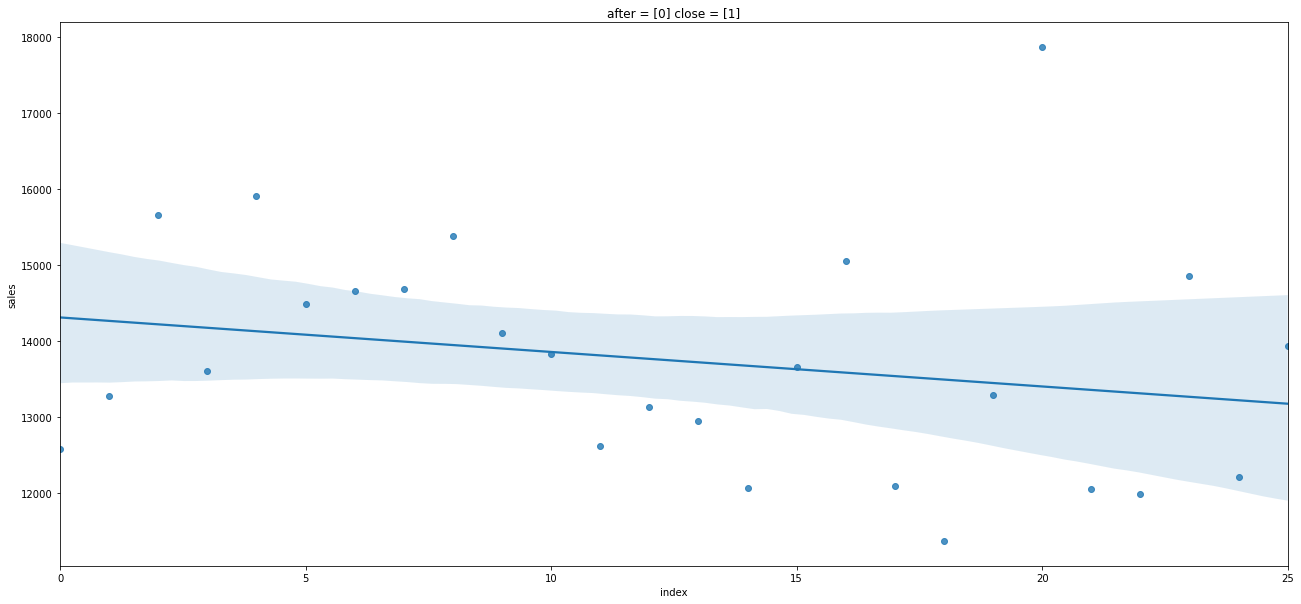

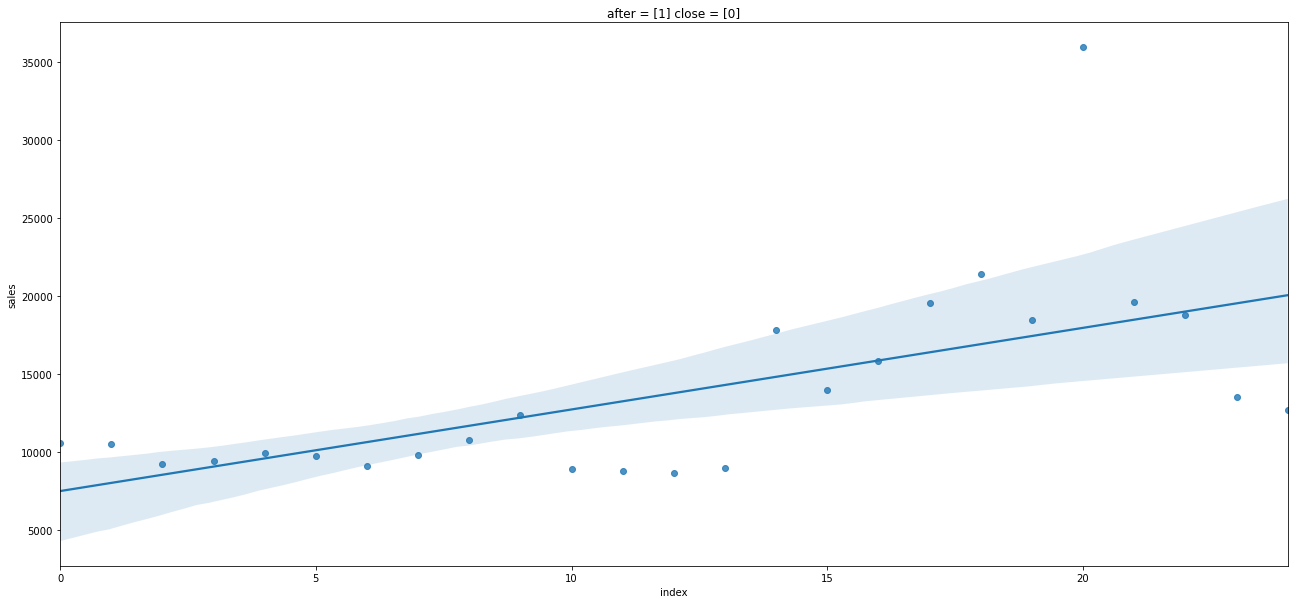

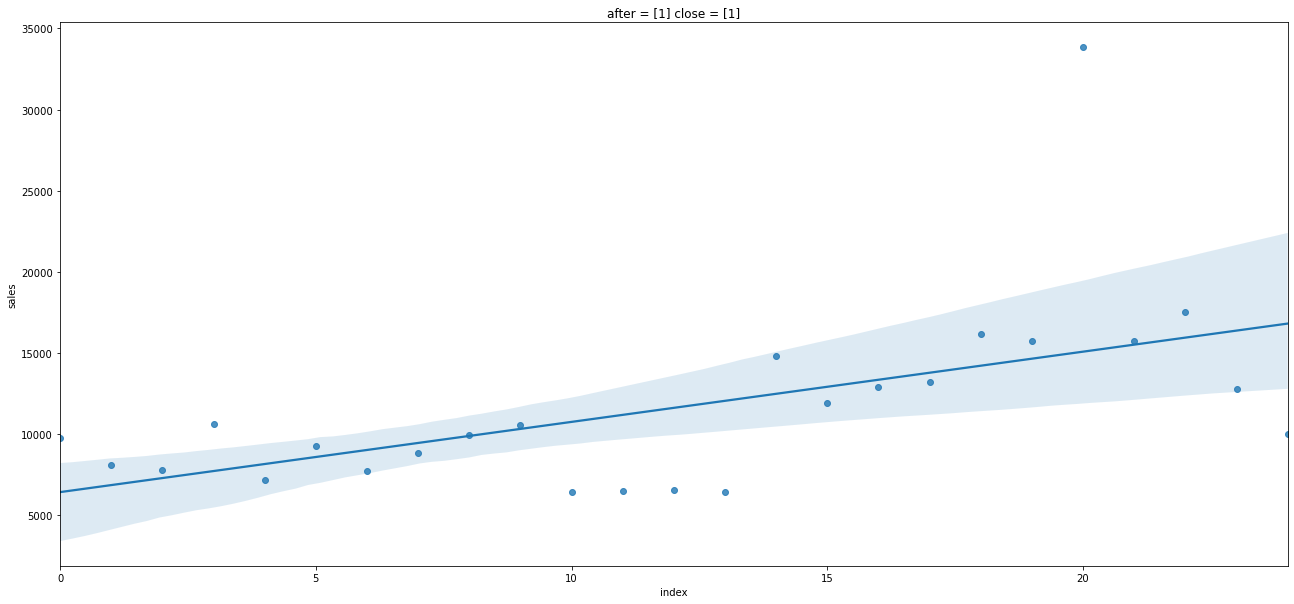

In [141]:
for after, online_dum1 in online_grp_week.groupby(level=[0,1]):
    online_dum2 =online_dum1.reset_index().reset_index()
    print(online_dum2)
    # Grafico solo un delito para verificar que la pendiente es correcta
    plt.figure(figsize=(22,10))
    plt.title("after = " + str(online_dum2["after"].unique()) + " close = " + str(online_dum2["close"].unique()))
    sns.regplot(x="index", y="sales", data = online_dum2, order=1)
    #ind = np.arange(len(year_weak_lst))
    #plt.xticks(ind, year_weak_lst)


    #plt.figure(figsize=(22,10))
    #sns.regplot(x="index", y="sales", data = online_dum2, order=1)

In [37]:
online_piv = online_grp.pivot(index='after', columns ='close')
online_piv

TypeError: pivot() got an unexpected keyword argument 'normalize'

In [7]:
bm = pd.read_csv("Data/bops_bm.csv")

In [8]:
print(bm.head())
print(bm.tail())

   id (store)  year  month  week  usa  after    sales
0           1  2011      4    16    0      0  118,691
1           1  2011      4    17    0      0  113,804
2           1  2011      4    18    0      0  172,104
3           1  2011      5    19    0      0  105,591
4           1  2011      5    20    0      0   94,884
      id (store)  year  month  week  usa  after   sales
4531         169  2012      3    12    1      1  56,331
4532         169  2012      3    13    1      1  74,388
4533         169  2012      3    14    1      1  67,671
4534         169  2012      4    15    1      1  50,140
4535         169  2012      4    16    1      1  75,023


In [9]:
print(bm.dtypes)
print(bm.describe())

id (store)     int64
year           int64
month          int64
week           int64
usa            int64
after          int64
sales         object
dtype: object
        id (store)         year        month         week          usa  \
count  4536.000000  4536.000000  4536.000000  4536.000000  4536.000000   
mean     84.738095  2011.296296     6.314815    26.796296     0.797619   
std      49.434118     0.456674     3.479549    15.228823     0.401819   
min       1.000000  2011.000000     1.000000     1.000000     0.000000   
25%      42.500000  2011.000000     3.000000    14.000000     1.000000   
50%      84.000000  2011.000000     6.000000    26.500000     1.000000   
75%     127.500000  2012.000000     9.000000    40.000000     1.000000   
max     169.000000  2012.000000    12.000000    53.000000     1.000000   

             after  
count  4536.000000  
mean      0.500000  
std       0.500055  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max 

In [10]:
# Limpiando y corrigiendo el tipo de dato
bm["sales"] = bm["sales"].str.replace(',','')
bm["sales"] = bm["sales"].astype("float64")

In [11]:
print(bm.dtypes)
print(bm.describe())

id (store)      int64
year            int64
month           int64
week            int64
usa             int64
after           int64
sales         float64
dtype: object
        id (store)         year        month         week          usa  \
count  4536.000000  4536.000000  4536.000000  4536.000000  4536.000000   
mean     84.738095  2011.296296     6.314815    26.796296     0.797619   
std      49.434118     0.456674     3.479549    15.228823     0.401819   
min       1.000000  2011.000000     1.000000     1.000000     0.000000   
25%      42.500000  2011.000000     3.000000    14.000000     1.000000   
50%      84.000000  2011.000000     6.000000    26.500000     1.000000   
75%     127.500000  2012.000000     9.000000    40.000000     1.000000   
max     169.000000  2012.000000    12.000000    53.000000     1.000000   

             after          sales  
count  4536.000000    4536.000000  
mean      0.500000   63873.317019  
std       0.500055   36531.546280  
min       0.000000   

Explorando los datos

In [12]:
for column in bm.columns.values.tolist():
    print(column)
    print(bm[column].value_counts())
    print("")

id (store)
167    54
117    54
85     54
89     54
93     54
       ..
39     54
43     54
47     54
71     54
48     54
Name: id (store), Length: 84, dtype: int64

year
2011    3192
2012    1344
Name: year, dtype: int64

month
1     504
10    420
5     420
8     420
4     420
11    336
7     336
3     336
6     336
2     336
9     336
12    336
Name: month, dtype: int64

week
16    168
51     84
1      84
41     84
37     84
33     84
29     84
25     84
21     84
17     84
13     84
9      84
5      84
52     84
49     84
48     84
44     84
40     84
36     84
32     84
28     84
24     84
20     84
12     84
8      84
45     84
53     84
47     84
2      84
43     84
39     84
35     84
31     84
27     84
23     84
19     84
15     84
11     84
7      84
3      84
50     84
46     84
42     84
38     84
34     84
30     84
26     84
22     84
18     84
14     84
10     84
6      84
4      84
Name: week, dtype: int64

usa
1    3618
0     918
Name: usa, dtype: int64

after
1    2268

In [13]:
for column in online.columns.values.tolist():
    print(column)
    print(online[column].value_counts())
    print("")

id (DMA)
207    51
209    51
186    51
178    51
170    51
       ..
37     51
29     51
21     51
13     51
8      51
Name: id (DMA), Length: 210, dtype: int64

year
2011    7770
2012    2940
Name: year, dtype: int64

month
1     1260
5     1050
10    1050
8     1050
7      840
6      840
12     840
11     840
3      840
2      840
9      840
4      420
Name: month, dtype: int64

week
47    210
2     210
27    210
19    210
11    210
3     210
50    210
42    210
34    210
26    210
18    210
10    210
49    210
43    210
41    210
33    210
25    210
17    210
9     210
1     210
48    210
40    210
32    210
24    210
35    210
51    210
39    210
45    210
31    210
23    210
7     210
46    210
38    210
30    210
22    210
14    210
6     210
53    210
37    210
4     210
29    210
21    210
13    210
5     210
52    210
44    210
36    210
28    210
20    210
12    210
8     210
Name: week, dtype: int64

after
0    5460
1    5250
Name: after, dtype: int64

close
0    5559
1    5

In [46]:
bm.groupby(['after'])['sales'].mean().reset_index()

,after,sales
0,0,67645.710758
1,1,60100.923280
